Author: Clement Chen</br>
E-Mail: clement1972@gmail.com</br>
https://sites.google.com/site/clement1972/</br>

# 參數設定

### <font color='red'>請修改下面的參數</font>

In [1]:
# eval_metric 評估指標
# options for classification:
#  ['accuracy', 'balanced_accuracy', 'f1', 'f1_macro', 'f1_micro', 'f1_weighted',
#  'roc_auc', 'roc_auc_ovo_macro', 'average_precision', 'precision', 'precision_macro',
#  'precision_micro', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro',
# 'recall_weighted', 'log_loss', 'pac_score']
#
# Options for regression:
#  ['root_mean_squared_error', 'mean_squared_error', 'mean_absolute_error',
#  'median_absolute_error', 'mean_absolute_percentage_error','r2']
eval_metric = None
# eval_metric = 'r2'

# data_filename 預測資料來源的檔名
data_filename = 'dataset/人員資料_test.xlsx'

# prediction_filename 模型預測結果的檔名
prediction_filename = 'output/人員資料_test_prediction.xlsx'

# model_path 模型儲存資料夾
model_path = 'output/model_人員資料'


### 環境設定

In [2]:
environment_type = 1
#檢查執行環境是不是Colab
environment_base_folder = ''
if environment_type == 1:
    from google.colab import drive
    drive.mount('/content/drive') # 此處需要登入google帳號
    environment_base_folder = '/content/drive/MyDrive'
    ! pip install autogluon

Mounted at /content/gdrive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.3/372.3 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72

### 載入資料

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_excel(environment_base_folder+data_filename)
data

,員工編號(EmployeeNumber),性別(Gender),年齡(Age),是否為成年人(Over18),婚姻狀態(MaritalStatus),通勤距離(DistanceFromHome),教育程度(Education),教育專業領域(EducationField),部門(Department),職位名稱(JobRole),...,股票選擇權等級(StockOptionLevel),績效評估(PerformanceRating),出差頻率(BusinessTravel),去年訓練時間(TrainingTimesLastYear),工作滿意度(JobSatisfaction),工作環境滿意度(EnvironmentSatisfaction),工作投入(JobInvolvement),工作生活平衡(WorkLifeBalance),人際關係滿意度(RelationshipSatisfaction),離職(Attrition)
0,1469,Male,28,Y,Single,5,3,Medical,Sales,Sales Executive,...,0,3,Travel_Rarely,4,1,4,3,3,4,No
1,250,Female,53,Y,Divorced,13,2,Medical,Research & Development,Manufacturing Director,...,2,3,Travel_Rarely,3,1,4,4,3,3,No
2,1714,Male,24,Y,Married,22,1,Human Resources,Human Resources,Human Resources,...,1,3,Travel_Rarely,2,3,4,1,3,3,Yes
3,86,Male,45,Y,Divorced,7,3,Life Sciences,Research & Development,Research Scientist,...,1,3,Travel_Rarely,2,1,2,3,3,3,No
4,304,Male,36,Y,Single,5,2,Life Sciences,Research & Development,Laboratory Technician,...,0,3,Travel_Rarely,3,2,4,3,4,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,786,Male,34,Y,Single,2,3,Other,Sales,Sales Executive,...,0,4,Travel_Rarely,5,4,4,3,3,3,No
290,775,Female,34,Y,Divorced,8,5,Life Sciences,Research & Development,Manufacturing Director,...,1,3,Travel_Rarely,3,1,2,3,3,3,No
291,1317,Female,50,Y,Married,28,3,Life Sciences,Research & Development,Research Director,...,0,3,Travel_Rarely,2,1,4,3,3,2,No
292,715,Male,37,Y,Single,10,2,Life Sciences,Research & Development,Research Scientist,...,0,3,Travel_Rarely,2,4,4,4,3,1,No


### 載入模型

In [5]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [6]:
import pickle
with open(environment_base_folder+model_path+'/used_field.bin', 'rb') as handle:
  used_field = pickle.load(handle)

input_field = used_field['input_field']
target_field = used_field['target_field']
working_field = input_field.copy()
working_field.append(target_field)

model = TabularPredictor.load(environment_base_folder+model_path)

# 輸出預測結果

In [7]:
prediction_p = None
if (model.problem_type != 'regression'):
  prediction_p = model.predict_proba(data)
prediction = model.predict(data)

In [8]:
pred_data = data.copy()
pred_data['預測結果'] = prediction
pred_data = pd.concat([pred_data,prediction_p], axis=1, join='inner')
pred_data.to_excel(environment_base_folder+prediction_filename)

# 評估分數

In [9]:
model.evaluate(data)

{'accuracy': 0.891156462585034,
 'balanced_accuracy': 0.6440422322775263,
 'mcc': 0.4186565471991133,
 'roc_auc': 0.8009049773755657,
 'f1': 0.42857142857142866,
 'precision': 0.7058823529411765,
 'recall': 0.3076923076923077}

# 欄位重要性

In [10]:
output = ''
if target_field in data:
    output = model.feature_importance(data)
output

These features in provided data are not utilized by the predictor and will be ignored: ['是否為成年人(Over18)', '標準工作時間(StandardHours)']


,importance,stddev,p_value,n,p99_high,p99_low
教育專業領域(EducationField),0.018367,0.007452,0.002644,5,0.033711,0.003024
職位名稱(JobRole),0.015646,0.007053,0.003852,5,0.030169,0.001124
通勤距離(DistanceFromHome),0.013605,0.008672,0.012356,5,0.031461,-0.004250
工作環境滿意度(EnvironmentSatisfaction),0.013605,0.006363,0.004385,5,0.026708,0.000503
工作滿意度(JobSatisfaction),0.013605,0.005378,0.002406,5,0.024679,0.002532
部門(Department),0.012245,0.004563,0.001941,5,0.021641,0.002849
加班(OverTime),0.011565,0.007053,0.010730,5,0.026087,-0.002958
工作投入(JobInvolvement),0.009524,0.008121,0.029325,5,0.026244,-0.007197
出差頻率(BusinessTravel),0.008844,0.005158,0.009281,5,0.019465,-0.001778
工作生活平衡(WorkLifeBalance),0.008163,0.007053,0.030406,5,0.022686,-0.006359


# 圖表 - 分類問題

## ROC Curve

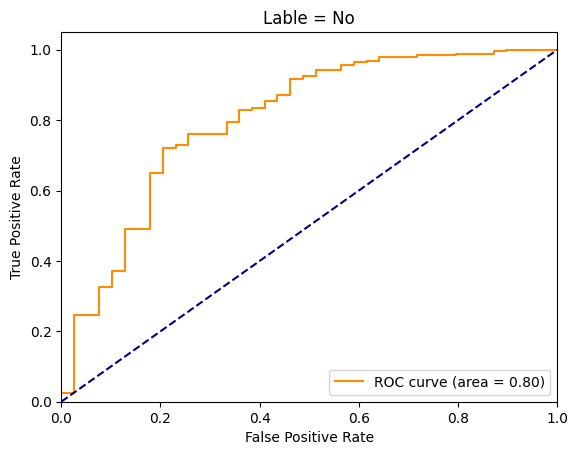

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt

class_labels = model.class_labels

if target_field in data:
    if (model.problem_type != 'regression'):
        if (model.problem_type == 'binary'):
            class_labels = [class_labels[0]]

        for n,label in enumerate(class_labels):
            roc_score = roc_auc_score(np.array(data[target_field] == label,dtype='int'), prediction_p[label])

            fpr, tpr, thresholds = metrics.roc_curve(np.array(data[target_field] == label,dtype='int'), prediction_p[label])

            plt.figure()
            plt.plot(fpr,tpr,color="darkorange",label="ROC curve (area = %0.2f)" % roc_score)
            plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("Lable = "+str(label))
            plt.legend(loc="lower right")
            plt.show()

## Confusion Matrix

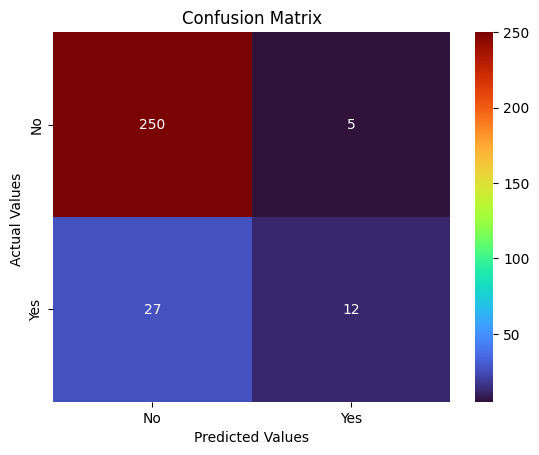

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

if target_field in data:
    if (model.problem_type != 'regression'):
        conf_matrix = (confusion_matrix(data[target_field], prediction))
        conf_matrix_df = pd.DataFrame(conf_matrix, model.class_labels, model.class_labels)
        conf_matrix_df

        fx = sns.heatmap(conf_matrix_df, annot=True, cmap='turbo', fmt='d')

        fx.set_title('Confusion Matrix')
        fx.set_xlabel('Predicted Values')
        fx.set_ylabel('Actual Values ')

# 圖表 - 回歸問題

In [13]:
import seaborn as sns

if target_field in data:
    if (model.problem_type == 'regression'):
        sns.regplot(x = data[target_field], y = prediction)
        plt.xlabel("real")
        plt.ylabel("prediction")